In [1]:
import pyspark as ps
from pyspark.sql import SparkSession

# Start Spark Session and Load Data

In [2]:
spark1 = SparkSession.builder.appName('Ops').getOrCreate()

In [3]:
path = "yelp_dataset/user.json"
user_df = spark1.read.json(path)

In [4]:
user_df.printSchema()
user_df.createOrReplaceTempView("user")

root
 |-- average_stars: double (nullable = true)
 |-- compliment_cool: long (nullable = true)
 |-- compliment_cute: long (nullable = true)
 |-- compliment_funny: long (nullable = true)
 |-- compliment_hot: long (nullable = true)
 |-- compliment_list: long (nullable = true)
 |-- compliment_more: long (nullable = true)
 |-- compliment_note: long (nullable = true)
 |-- compliment_photos: long (nullable = true)
 |-- compliment_plain: long (nullable = true)
 |-- compliment_profile: long (nullable = true)
 |-- compliment_writer: long (nullable = true)
 |-- cool: long (nullable = true)
 |-- elite: string (nullable = true)
 |-- fans: long (nullable = true)
 |-- friends: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- name: string (nullable = true)
 |-- review_count: long (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)
 |-- yelping_since: string (nullable = true)



+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+----+--------------+----+--------------------+-----+------+------------+------+--------------------+-------------------+
|average_stars|compliment_cool|compliment_cute|compliment_funny|compliment_hot|compliment_list|compliment_more|compliment_note|compliment_photos|compliment_plain|compliment_profile|compliment_writer|cool|         elite|fans|             friends|funny|  name|review_count|useful|             user_id|      yelping_since|
+-------------+---------------+---------------+----------------+--------------+---------------+---------------+---------------+-----------------+----------------+------------------+-----------------+----+--------------+----+--------------------+-----+------+------------+------+--------------------+-------------------+
|         4.03|              1|         

In [8]:
#states_breakdown_df = spark1.sql("SELECT state, count(*) from business group by state")
path = "yelp_dataset/business.json"
business_df = spark1.read.json(path)
business_df.printSchema()
business_df.createOrReplaceTempView("business")

root
 |-- address: string (nullable = true)
 |-- attributes: struct (nullable = true)
 |    |-- AcceptsInsurance: string (nullable = true)
 |    |-- AgesAllowed: string (nullable = true)
 |    |-- Alcohol: string (nullable = true)
 |    |-- Ambience: string (nullable = true)
 |    |-- BYOB: string (nullable = true)
 |    |-- BYOBCorkage: string (nullable = true)
 |    |-- BestNights: string (nullable = true)
 |    |-- BikeParking: string (nullable = true)
 |    |-- BusinessAcceptsBitcoin: string (nullable = true)
 |    |-- BusinessAcceptsCreditCards: string (nullable = true)
 |    |-- BusinessParking: string (nullable = true)
 |    |-- ByAppointmentOnly: string (nullable = true)
 |    |-- Caters: string (nullable = true)
 |    |-- CoatCheck: string (nullable = true)
 |    |-- Corkage: string (nullable = true)
 |    |-- DietaryRestrictions: string (nullable = true)
 |    |-- DogsAllowed: string (nullable = true)
 |    |-- DriveThru: string (nullable = true)
 |    |-- GoodForDancing: str

In [68]:
path = "yelp_dataset/review.json"
review_df = spark1.read.json(path)
review_df.printSchema()

root
 |-- business_id: string (nullable = true)
 |-- cool: long (nullable = true)
 |-- date: string (nullable = true)
 |-- funny: long (nullable = true)
 |-- review_id: string (nullable = true)
 |-- stars: double (nullable = true)
 |-- text: string (nullable = true)
 |-- useful: long (nullable = true)
 |-- user_id: string (nullable = true)



In [69]:
review_df.createOrReplaceTempView("review")

# Data Exploration

In [67]:
sample_business_query = spark1.sql("SELECT city, state, COUNT(*) c from business GROUP BY city, state ORDER BY c DESC")



In [19]:
sample_business_query.show() #Number of businesses per state

+---------------+-----+-----+
|           city|state|    c|
+---------------+-----+-----+
|      Las Vegas|   NV|29361|
|        Toronto|   ON|18904|
|        Phoenix|   AZ|18764|
|      Charlotte|   NC| 9507|
|     Scottsdale|   AZ| 8837|
|        Calgary|   AB| 7735|
|     Pittsburgh|   PA| 7016|
|       Montréal|   QC| 6449|
|           Mesa|   AZ| 6080|
|      Henderson|   NV| 4892|
|          Tempe|   AZ| 4550|
|       Chandler|   AZ| 4307|
|      Cleveland|   OH| 3605|
|       Glendale|   AZ| 3542|
|        Madison|   WI| 3493|
|        Gilbert|   AZ| 3460|
|    Mississauga|   ON| 3112|
|         Peoria|   AZ| 1919|
|        Markham|   ON| 1766|
|North Las Vegas|   NV| 1547|
+---------------+-----+-----+
only showing top 20 rows



In [22]:
#Number of reviews per city
review_counts = spark1.sql("SELECT city, state, COUNT(*) c from business JOIN review ON business.business_id=review.business_id GROUP BY city,state ORDER BY c DESC")
review_counts.show(50, False)

+-----------------+-----+-------+
|city             |state|c      |
+-----------------+-----+-------+
|Las Vegas        |NV   |2030062|
|Phoenix          |AZ   |734105 |
|Toronto          |ON   |525422 |
|Scottsdale       |AZ   |387550 |
|Charlotte        |NC   |309406 |
|Pittsburgh       |PA   |225489 |
|Henderson        |NV   |219880 |
|Tempe            |AZ   |202074 |
|Mesa             |AZ   |168311 |
|Chandler         |AZ   |157569 |
|Montréal         |QC   |151238 |
|Gilbert          |AZ   |129028 |
|Cleveland        |OH   |114389 |
|Madison          |WI   |104634 |
|Glendale         |AZ   |100299 |
|Calgary          |AB   |97647  |
|Peoria           |AZ   |57857  |
|Mississauga      |ON   |55585  |
|Markham          |ON   |51296  |
|North Las Vegas  |NV   |50937  |
|Surprise         |AZ   |34877  |
|Champaign        |IL   |30904  |
|Goodyear         |AZ   |28596  |
|Richmond Hill    |ON   |24242  |
|Avondale         |AZ   |22133  |
|North York       |ON   |20353  |
|Scarborough  

In [23]:
#Average reviews per state
review_counts = spark1.sql("SELECT state, COUNT(*) c, AVG(review.stars) s from business JOIN review ON business.business_id=review.business_id GROUP BY state ORDER BY c DESC")
review_counts.show(100, False)



+-----+-------+------------------+
|state|c      |s                 |
+-----+-------+------------------+
|NV   |2320491|3.755840466521956 |
|AZ   |2082951|3.7554661631502615|
|ON   |784461 |3.537222373068897 |
|NC   |408060 |3.671072881439004 |
|OH   |321345 |3.6708926543123432|
|PA   |290097 |3.716132879691965 |
|QC   |179039 |3.844201542680645 |
|WI   |133660 |3.71846476133473  |
|AB   |99639  |3.576802256144682 |
|IL   |42371  |3.582804276509877 |
|SC   |21272  |3.5886611508085746|
|TX   |1071   |4.144724556489263 |
|FL   |726    |1.5110192837465564|
|NY   |283    |3.0636042402826855|
|CA   |251    |3.9282868525896415|
|WA   |19     |1.6842105263157894|
|CT   |17     |3.4705882352941178|
|VA   |16     |4.0               |
|NM   |14     |2.7142857142857144|
|GA   |14     |3.0               |
|XGM  |14     |3.7142857142857144|
|NE   |12     |2.5833333333333335|
|AL   |12     |4.083333333333333 |
|VT   |8      |4.5               |
|XWY  |8      |4.5               |
|NJ   |8      |4.875

In [24]:
#Total number of reviews
review_counts = spark1.sql("SELECT COUNT(*) FROM review")
review_counts.show()

+--------+
|count(1)|
+--------+
| 6685900|
+--------+



In [25]:
#Ensuring lossless join
review_counts = spark1.sql("SELECT COUNT(*) FROM business JOIN review ON business.business_id = review.business_id")
review_counts.show()



+--------+
|count(1)|
+--------+
| 6685900|
+--------+



In [28]:
#Number of reviews in each year
dates = spark1.sql("SELECT COUNT(*) FROM review w")
datestest = spark1.sql("SELECT EXTRACT(YEAR FROM date) y, COUNT(*) FROM review GROUP BY y ORDER BY y")
datestest.show(50, False)

+----+--------+
|y   |count(1)|
+----+--------+
|2004|13      |
|2005|876     |
|2006|5081    |
|2007|21389   |
|2008|57347   |
|2009|101173  |
|2010|187387  |
|2011|302867  |
|2012|367090  |
|2013|491294  |
|2014|704862  |
|2015|952400  |
|2016|1098786 |
|2017|1217673 |
|2018|1177662 |
+----+--------+



In [70]:
#Number of reviews in each month
datestest = spark1.sql("SELECT EXTRACT(YEAR FROM date) y, EXTRACT(MONTH FROM date) m, COUNT(*) FROM review GROUP BY y,m ORDER BY y DESC,m DESC")
datestest.show(150, False)



+----+---+--------+
|y   |m  |count(1)|
+----+---+--------+
|2018|11 |51786   |
|2018|10 |103643  |
|2018|9  |103980  |
|2018|8  |120381  |
|2018|7  |126571  |
|2018|6  |116064  |
|2018|5  |115846  |
|2018|4  |115534  |
|2018|3  |119213  |
|2018|2  |100004  |
|2018|1  |104640  |
|2017|12 |93115   |
|2017|11 |94266   |
|2017|10 |100556  |
|2017|9  |102393  |
|2017|8  |111431  |
|2017|7  |116050  |
|2017|6  |105827  |
|2017|5  |104915  |
|2017|4  |102205  |
|2017|3  |102373  |
|2017|2  |90085   |
|2017|1  |94457   |
|2016|12 |83494   |
|2016|11 |79423   |
|2016|10 |87117   |
|2016|9  |89115   |
|2016|8  |99052   |
|2016|7  |104258  |
|2016|6  |96589   |
|2016|5  |94926   |
|2016|4  |92886   |
|2016|3  |93927   |
|2016|2  |88004   |
|2016|1  |89995   |
|2015|12 |75144   |
|2015|11 |76795   |
|2015|10 |82188   |
|2015|9  |80668   |
|2015|8  |92089   |
|2015|7  |90838   |
|2015|6  |82515   |
|2015|5  |80100   |
|2015|4  |75784   |
|2015|3  |78035   |
|2015|2  |66395   |
|2015|1  |71849   |


# Examining Phoenix Review and Economic Data

In [30]:
#Review data by Month
phoenix_reviews = spark1.sql("SELECT EXTRACT(YEAR FROM date) y, EXTRACT(MONTH FROM date) m, AVG(review.stars) s, COUNT(*) c FROM business JOIN review ON business.business_id=review.business_id WHERE city = 'Phoenix' GROUP BY y,m ORDER BY y DESC,m DESC")
phoenix_reviews.show(100, False)




+----+---+------------------+-----+
|y   |m  |s                 |c    |
+----+---+------------------+-----+
|2018|11 |3.7924907810928596|5966 |
|2018|10 |3.7710658601005367|11737|
|2018|9  |3.750930356193514 |11286|
|2018|8  |3.798352295017654 |12745|
|2018|7  |3.7931681681681684|13320|
|2018|6  |3.7911895674300253|12576|
|2018|5  |3.7747609942638625|13075|
|2018|4  |3.7958705188322495|13222|
|2018|3  |3.7846342165898617|13888|
|2018|2  |3.796786561986489 |10954|
|2018|1  |3.8223363509749304|11488|
|2017|12 |3.7571096042910637|9881 |
|2017|11 |3.7494858485946527|10211|
|2017|10 |3.8122740499074155|11341|
|2017|9  |3.7699564586357037|11024|
|2017|8  |3.7772495755517825|11780|
|2017|7  |3.7793932263215395|11899|
|2017|6  |3.776716364610303 |11201|
|2017|5  |3.7735767057800955|11505|
|2017|4  |3.7772615708274895|11408|
|2017|3  |3.773704832390074 |11485|
|2017|2  |3.7850622406639003|9640 |
|2017|1  |3.8465009023461   |9974 |
|2016|12 |3.7431756141947226|8792 |
|2016|11 |3.8203470975463794

In [32]:
#Importing review data to pandas dataframe
phoenix_reviews_df=phoenix_reviews.toPandas()
phoenix_reviews_df.head()

,y,m,s,c
0,2018,11,3.792491,5966
1,2018,10,3.771066,11737
2,2018,9,3.750930,11286
3,2018,8,3.798352,12745
4,2018,7,3.793168,13320


In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [34]:
phoenix_unemployment_df = pd.read_csv('phoenix_unemployment.csv')

In [36]:
phoenix_unemployment_df['DATE dt']=pd.to_datetime(phoenix_unemployment_df['DATE'])

In [37]:
phoenix_unemployment_df['m'] = phoenix_unemployment_df['DATE dt'].map(lambda x: x.month)
phoenix_unemployment_df['y'] = phoenix_unemployment_df['DATE dt'].map(lambda x: x.year)
phoenix_unemployment_df.head()

,DATE,PHOE004UR,DATE dt,m,y
0,1/1/90,4.4,1990-01-01,1,1990
1,2/1/90,4.4,1990-02-01,2,1990
2,3/1/90,4.4,1990-03-01,3,1990
3,4/1/90,4.5,1990-04-01,4,1990
4,5/1/90,4.5,1990-05-01,5,1990


In [38]:
phoenix_merged=pd.merge(phoenix_unemployment_df, phoenix_reviews_df, how='inner', on=['m', 'y'], left_index=False, right_index=False) 
phoenix_merged=phoenix_merged[phoenix_merged['y'] > 2010]      
        
        

In [72]:
phoenix_merged.columns = ['Date', 'Unemployment', 'Date dt', 'm', 'y', 'Stars', 'Count']
phoenix_merged.head()

,Date,Unemployment,Date dt,m,y,Stars,Count
70,1/1/11,9.0,2011-01-01,1,2011,3.750269,2783
71,2/1/11,8.9,2011-02-01,2,2011,3.751375,2546
72,3/1/11,8.8,2011-03-01,3,2011,3.784010,3102
73,4/1/11,8.7,2011-04-01,4,2011,3.781089,2718
74,5/1/11,8.7,2011-05-01,5,2011,3.749045,2881


Text(0.5,0,'Unemployment')

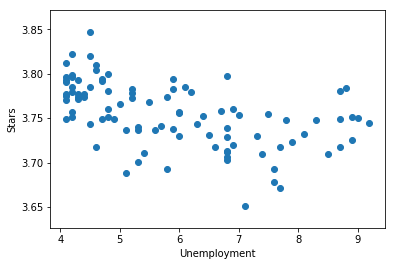

In [73]:
plt.scatter(phoenix_merged['Unemployment'], phoenix_merged['Stars'])
plt.ylabel("Stars")
plt.xlabel("Unemployment")

In [81]:
np.corrcoef(phoenix_merged['Unemployment'], phoenix_merged['Stars'])

array([[ 1.        , -0.51258045],
       [-0.51258045,  1.        ]])

## Linear Regression

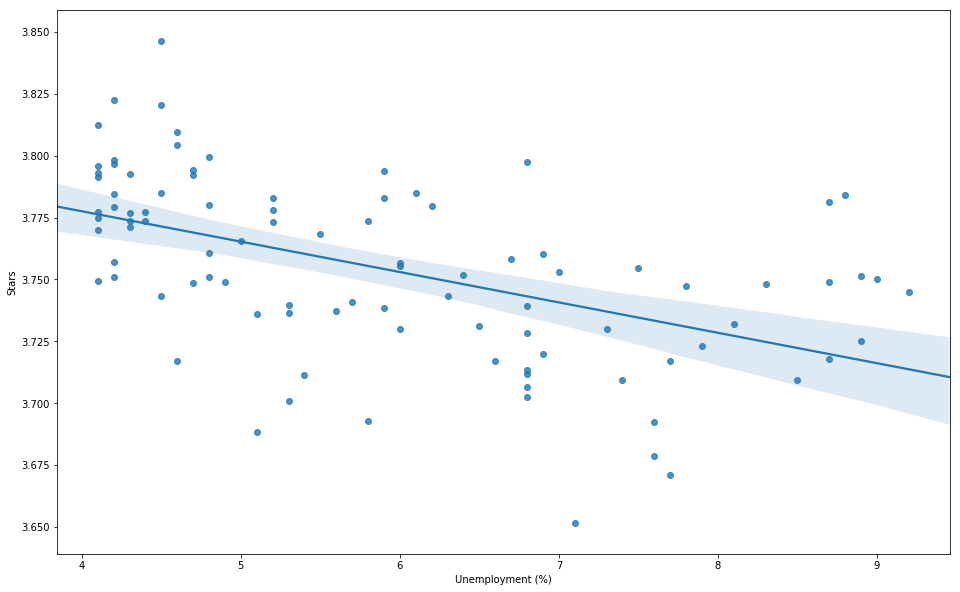

In [77]:
import seaborn as sns
plt.figure(figsize=(16, 10))
sns.regplot(x='Unemployment', y='Stars', data=phoenix_merged);
plt.ylabel("Stars")
plt.xlabel("Unemployment (%)")
plt.savefig("unemployment.png")

In [80]:
import statsmodels.formula.api as smf
mod = smf.ols('Unemployment~Stars', data=phoenix_merged)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Unemployment   R-squared:                       0.263
Model:                            OLS   Adj. R-squared:                  0.255
Method:                 Least Squares   F-statistic:                     33.14
Date:                Thu, 12 Dec 2019   Prob (F-statistic):           1.09e-07
Time:                        21:30:16   Log-Likelihood:                -159.33
No. Observations:                  95   AIC:                             322.7
Df Residuals:                      93   BIC:                             327.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     86.2309     13.957      6.178      0.000      58.515     113.947
Stars        -21.4007      3.717     -5.757      0.000     -28.783     -14.019
==============================================================================
Omnibus:                       10.808   Durbin-Watson:                   0.444
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               11.378
Skew:                           0.840   Prob(JB):                      0.00338
Kurtosis:                       3.233   Cond. No.                         418.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#  Sources
- https://fred.stlouisfed.org/series/PHOE004UR